In [1]:
# 모듈 importing
from pykrx import stock
from pykrx import bond
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import mplfinance as mpf
import talib

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

In [2]:
# csv 파일 불러오기
df_sector_day = pd.read_csv('./섹터별_일별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')
df_sector_month = pd.read_csv('./섹터별_월별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')
df_sector_year = pd.read_csv('./섹터별_연별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')

df_sector_year

,date,Open,High,Low,Close,Volume,Volume($),sector_name,sector_ticker
0,2003-12-31,578.50,824.26,512.30,810.71,109666469113,355362625966515,코스피,1001
1,2003-12-31,816.98,1270.76,756.76,1266.36,5589244098,8933445615790,음식료품,1005
2,2003-12-31,117.12,117.64,78.72,90.20,9205431257,1497448308875,섬유의복,1006
3,2003-12-31,175.06,203.93,150.14,194.75,5508241603,1220602136115,종이목재,1007
4,2003-12-31,619.29,1038.90,518.64,994.42,6270364006,26070792443745,화학,1008
...,...,...,...,...,...,...,...,...,...
432,2021-12-31,185.12,282.91,166.25,193.06,1407731703,35897640413720,은행,1022
433,2021-12-31,1902.61,2369.43,1867.02,2108.20,7691095846,28474680972715,증권,1024
434,2021-12-31,12662.50,15418.54,11521.91,13285.27,3066466572,39433182409995,보험,1025
435,2021-12-31,1642.44,2262.17,1616.31,1903.83,15917863397,259516577717420,서비스업,1026


In [3]:
df_sector_day['date'] = df_sector_day['date'].astype("datetime64")
df_sector_month['date'] = df_sector_month['date'].astype("datetime64")
df_sector_year['date'] = df_sector_year['date'].astype("datetime64")

In [4]:
time_list = [df_sector_day,df_sector_month,df_sector_year]
time_name_list = ['df_sector_day','df_sector_month','df_sector_year']
sector_name_list = ['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

In [5]:
# df_name_list 생성
df_name_list=[]
for i in range(len(time_list)):
    for j in range(len(sector_name_list)):
        df_name_list.append(time_name_list[i]+'_'+sector_name_list[j])
df_name_list = str(df_name_list).replace('\'', '')
df_name_list = df_name_list.replace(',', '=df_name_list[0]')
df_name_list

'[df_sector_day_코스피=df_name_list[0] df_sector_day_음식료품=df_name_list[0] df_sector_day_섬유의복=df_name_list[0] df_sector_day_종이목재=df_name_list[0] df_sector_day_화학=df_name_list[0] df_sector_day_의약품=df_name_list[0] df_sector_day_비금속광물=df_name_list[0] df_sector_day_철강금속=df_name_list[0] df_sector_day_기계=df_name_list[0] df_sector_day_전기전자=df_name_list[0] df_sector_day_의료정밀=df_name_list[0] df_sector_day_운수장비=df_name_list[0] df_sector_day_유통업=df_name_list[0] df_sector_day_전기가스업=df_name_list[0] df_sector_day_건설업=df_name_list[0] df_sector_day_운수창고업=df_name_list[0] df_sector_day_통신업=df_name_list[0] df_sector_day_금융업=df_name_list[0] df_sector_day_은행=df_name_list[0] df_sector_day_증권=df_name_list[0] df_sector_day_보험=df_name_list[0] df_sector_day_서비스업=df_name_list[0] df_sector_day_제조업=df_name_list[0] df_sector_month_코스피=df_name_list[0] df_sector_month_음식료품=df_name_list[0] df_sector_month_섬유의복=df_name_list[0] df_sector_month_종이목재=df_name_list[0] df_sector_month_화학=df_name_list[0] df_sector_month_의약품=df_na

In [6]:
index_list = (df_name_list+',').replace(',', '_index,').split(',')
index_list

['[df_sector_day_코스피=df_name_list[0] df_sector_day_음식료품=df_name_list[0] df_sector_day_섬유의복=df_name_list[0] df_sector_day_종이목재=df_name_list[0] df_sector_day_화학=df_name_list[0] df_sector_day_의약품=df_name_list[0] df_sector_day_비금속광물=df_name_list[0] df_sector_day_철강금속=df_name_list[0] df_sector_day_기계=df_name_list[0] df_sector_day_전기전자=df_name_list[0] df_sector_day_의료정밀=df_name_list[0] df_sector_day_운수장비=df_name_list[0] df_sector_day_유통업=df_name_list[0] df_sector_day_전기가스업=df_name_list[0] df_sector_day_건설업=df_name_list[0] df_sector_day_운수창고업=df_name_list[0] df_sector_day_통신업=df_name_list[0] df_sector_day_금융업=df_name_list[0] df_sector_day_은행=df_name_list[0] df_sector_day_증권=df_name_list[0] df_sector_day_보험=df_name_list[0] df_sector_day_서비스업=df_name_list[0] df_sector_day_제조업=df_name_list[0] df_sector_month_코스피=df_name_list[0] df_sector_month_음식료품=df_name_list[0] df_sector_month_섬유의복=df_name_list[0] df_sector_month_종이목재=df_name_list[0] df_sector_month_화학=df_name_list[0] df_sector_month_의약품=df_n

In [7]:
# 데이터를 연월일, 섹터별 분리
df_name_list=[]
for i in range(len(time_list)):
    for j in range(len(sector_name_list)):
        df_name_list.append(time_list[i][time_list[i]['sector_name']==sector_name_list[j]])

In [8]:
# 일별 섹터별 분리
df_sector_day_코스피=df_name_list[0]
df_sector_day_음식료품=df_name_list[1] 
df_sector_day_섬유의복=df_name_list[2] 
df_sector_day_종이목재=df_name_list[3] 
df_sector_day_화학=df_name_list[4] 
df_sector_day_의약품=df_name_list[5] 
df_sector_day_비금속광물=df_name_list[6]
df_sector_day_철강금속=df_name_list[7] 
df_sector_day_기계=df_name_list[8] 
df_sector_day_전기전자=df_name_list[9] 
df_sector_day_의료정밀=df_name_list[10]
df_sector_day_운수장비=df_name_list[11] 
df_sector_day_유통업=df_name_list[12] 
df_sector_day_전기가스업=df_name_list[13] 
df_sector_day_건설업=df_name_list[14] 
df_sector_day_운수창고업=df_name_list[15] 
df_sector_day_통신업=df_name_list[16]
df_sector_day_금융업=df_name_list[17] 
df_sector_day_은행=df_name_list[18] 
df_sector_day_증권=df_name_list[19] 
df_sector_day_보험=df_name_list[20] 
df_sector_day_서비스업=df_name_list[21] 
df_sector_day_제조업=df_name_list[22]

# 월별 섹터별 분리
df_sector_month_코스피=df_name_list[23]
df_sector_month_음식료품=df_name_list[24]
df_sector_month_섬유의복=df_name_list[25]
df_sector_month_종이목재=df_name_list[26]
df_sector_month_화학=df_name_list[27] 
df_sector_month_의약품=df_name_list[28]
df_sector_month_비금속광물=df_name_list[29] 
df_sector_month_철강금속=df_name_list[30] 
df_sector_month_기계=df_name_list[31]
df_sector_month_전기전자=df_name_list[32]
df_sector_month_의료정밀=df_name_list[33] 
df_sector_month_운수장비=df_name_list[34]
df_sector_month_유통업=df_name_list[35] 
df_sector_month_전기가스업=df_name_list[36] 
df_sector_month_건설업=df_name_list[37] 
df_sector_month_운수창고업=df_name_list[38] 
df_sector_month_통신업=df_name_list[39] 
df_sector_month_금융업=df_name_list[40] 
df_sector_month_은행=df_name_list[41] 
df_sector_month_증권=df_name_list[42] 
df_sector_month_보험=df_name_list[43]
df_sector_month_서비스업=df_name_list[44] 
df_sector_month_제조업=df_name_list[45] 

# 년별 섹터별 분리
df_sector_year_코스피=df_name_list[46] 
df_sector_year_음식료품=df_name_list[47]
df_sector_year_섬유의복=df_name_list[48] 
df_sector_year_종이목재=df_name_list[49] 
df_sector_year_화학=df_name_list[50] 
df_sector_year_의약품=df_name_list[51] 
df_sector_year_비금속광물=df_name_list[52] 
df_sector_year_철강금속=df_name_list[53] 
df_sector_year_기계=df_name_list[54] 
df_sector_year_전기전자=df_name_list[55] 
df_sector_year_의료정밀=df_name_list[56] 
df_sector_year_운수장비=df_name_list[57] 
df_sector_year_유통업=df_name_list[58] 
df_sector_year_전기가스업=df_name_list[59] 
df_sector_year_건설업=df_name_list[60] 
df_sector_year_운수창고업=df_name_list[61] 
df_sector_year_통신업=df_name_list[62] 
df_sector_year_금융업=df_name_list[63] 
df_sector_year_은행=df_name_list[64] 
df_sector_year_증권=df_name_list[65] 
df_sector_year_보험=df_name_list[66] 
df_sector_year_서비스업=df_name_list[67] 
df_sector_year_제조업=df_name_list[68]

# 연도별 코스피 기준 섹터별 추이변화

In [9]:
len(df_sector_year['date'].dt.year.unique())

19

In [10]:
df_sector_year_코스피_index = (df_sector_year_코스피['Close'] / df_sector_year_코스피['Close'].iloc[0]) * 100
df_sector_year_음식료품_index = (df_sector_year_음식료품['Close'] / df_sector_year_음식료품['Close'].iloc[0]) * 100
df_sector_year_섬유의복_index = (df_sector_year_섬유의복['Close'] / df_sector_year_섬유의복['Close'].iloc[0]) * 100
df_sector_year_종이목재_index = (df_sector_year_종이목재['Close'] / df_sector_year_종이목재['Close'].iloc[0]) * 100
df_sector_year_화학_index = (df_sector_year_화학['Close'] / df_sector_year_화학['Close'].iloc[0]) * 100
df_sector_year_의약품_index = (df_sector_year_의약품['Close'] / df_sector_year_의약품['Close'].iloc[0]) * 100
df_sector_year_비금속광물_index = (df_sector_year_비금속광물['Close'] / df_sector_year_비금속광물['Close'].iloc[0]) * 100
df_sector_year_철강금속_index = (df_sector_year_철강금속['Close'] / df_sector_year_철강금속['Close'].iloc[0]) * 100
df_sector_year_기계_index = (df_sector_year_기계['Close'] / df_sector_year_기계['Close'].iloc[0]) * 100
df_sector_year_전기전자_index = (df_sector_year_전기전자['Close'] / df_sector_year_전기전자['Close'].iloc[0]) * 100
df_sector_year_의료정밀_index = (df_sector_year_의료정밀['Close'] / df_sector_year_의료정밀['Close'].iloc[0]) * 100
df_sector_year_운수장비_index = (df_sector_year_운수장비['Close'] / df_sector_year_운수장비['Close'].iloc[0]) * 100
df_sector_year_유통업_index = (df_sector_year_유통업['Close'] / df_sector_year_유통업['Close'].iloc[0]) * 100
df_sector_year_전기가스업_index = (df_sector_year_전기가스업['Close'] / df_sector_year_전기가스업['Close'].iloc[0]) * 100
df_sector_year_건설업_index = (df_sector_year_건설업['Close'] / df_sector_year_건설업['Close'].iloc[0]) * 100
df_sector_year_운수창고업_index = (df_sector_year_운수창고업['Close'] / df_sector_year_운수창고업['Close'].iloc[0]) * 100
df_sector_year_통신업_index = (df_sector_year_통신업['Close'] / df_sector_year_통신업['Close'].iloc[0]) * 100
df_sector_year_금융업_index = (df_sector_year_금융업['Close'] / df_sector_year_금융업['Close'].iloc[0]) * 100
df_sector_year_은행_index = (df_sector_year_은행['Close'] / df_sector_year_은행['Close'].iloc[0]) * 100
df_sector_year_증권_index = (df_sector_year_증권['Close'] / df_sector_year_증권['Close'].iloc[0]) * 100
df_sector_year_보험_index = (df_sector_year_보험['Close'] / df_sector_year_보험['Close'].iloc[0]) * 100
df_sector_year_서비스업_index = (df_sector_year_서비스업['Close'] / df_sector_year_서비스업['Close'].iloc[0]) * 100
df_sector_year_제조업_index = (df_sector_year_제조업['Close'] / df_sector_year_제조업['Close'].iloc[0]) * 100

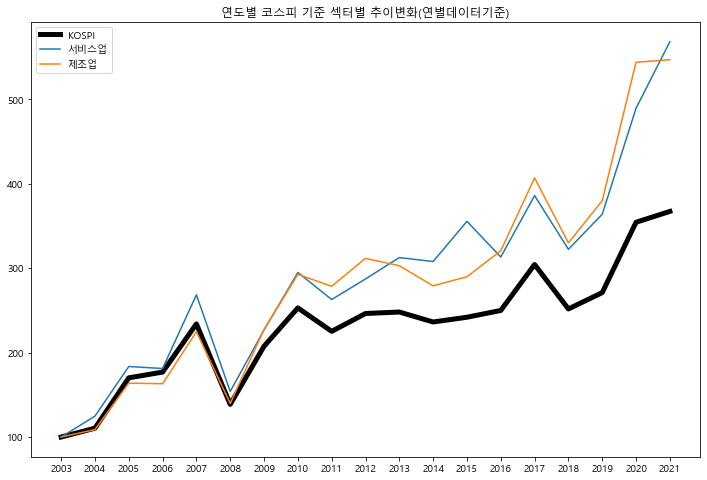

In [11]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_서비스업_index,label = "서비스업")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")

plt.legend()
plt.title("연도별 코스피 기준 섹터별 추이변화(연별데이터기준)")
plt.show()

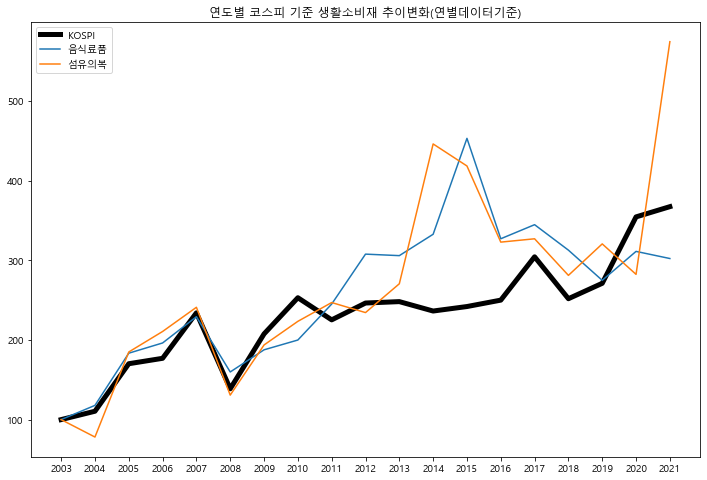

In [13]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_음식료품_index,label = "음식료품")
ax.plot(xtick_label_position,df_sector_year_섬유의복_index,label = "섬유의복")

plt.legend()
plt.title("연도별 코스피 기준 생활소비재 추이변화(연별데이터기준)")
plt.show()

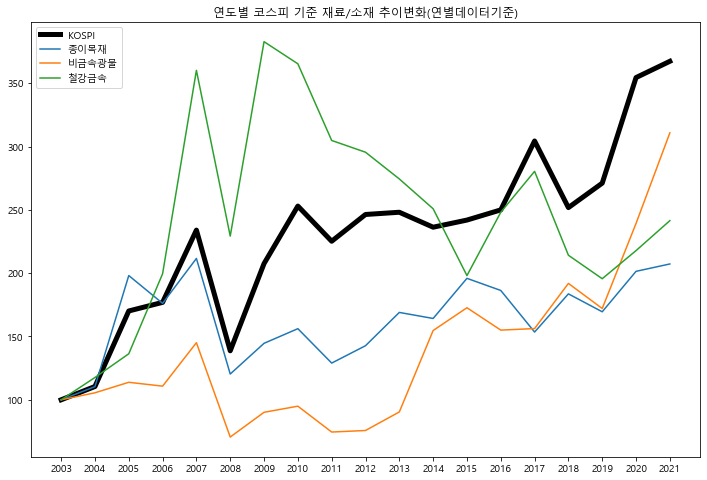

In [14]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_종이목재_index,label = "종이목재")
ax.plot(xtick_label_position,df_sector_year_비금속광물_index,label = "비금속광물")
ax.plot(xtick_label_position,df_sector_year_철강금속_index,label = "철강금속")

plt.legend()
plt.title("연도별 코스피 기준 재료/소재 추이변화(연별데이터기준)")
plt.show()

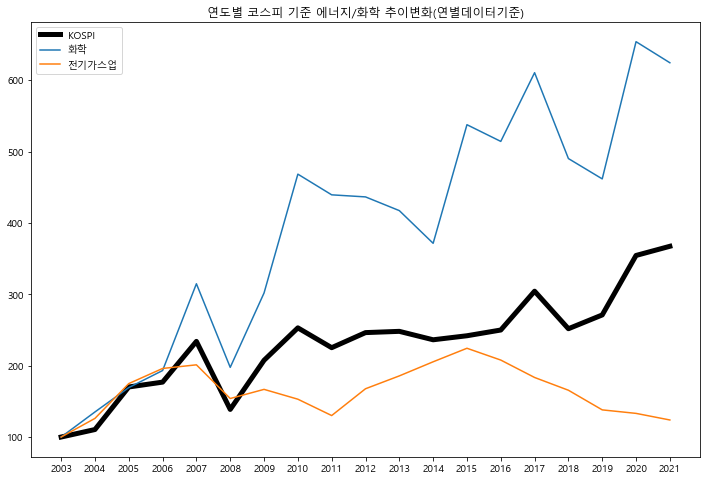

In [15]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_화학_index,label = "화학")
ax.plot(xtick_label_position,df_sector_year_전기가스업_index,label = "전기가스업")

plt.legend()
plt.title("연도별 코스피 기준 에너지/화학 추이변화(연별데이터기준)")
plt.show()

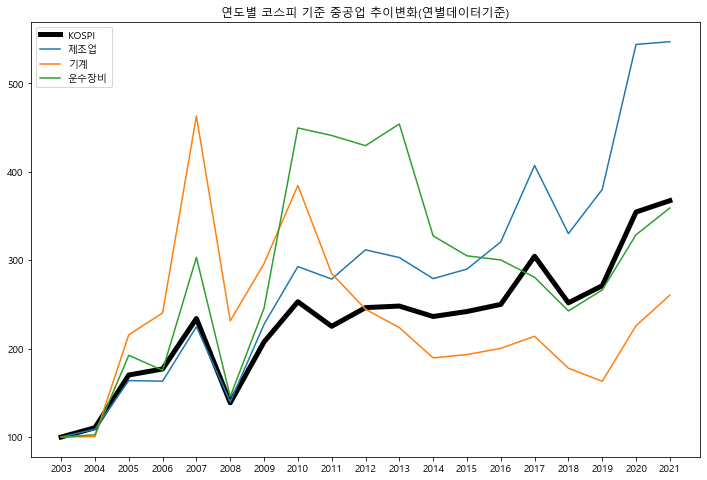

In [16]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_기계_index,label = "기계")
ax.plot(xtick_label_position,df_sector_year_운수장비_index,label = "운수장비")

plt.legend()
plt.title("연도별 코스피 기준 중공업 추이변화(연별데이터기준)")
plt.show()

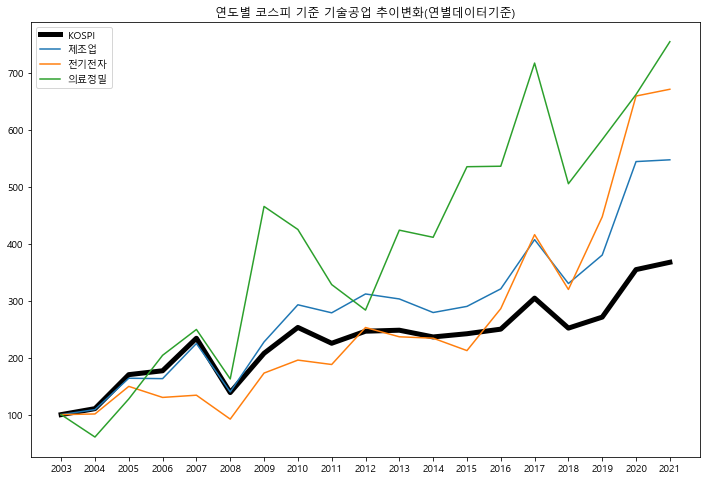

In [17]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_전기전자_index,label = "전기전자")
ax.plot(xtick_label_position,df_sector_year_의료정밀_index,label = "의료정밀")

plt.legend()
plt.title("연도별 코스피 기준 기술공업 추이변화(연별데이터기준)")
plt.show()

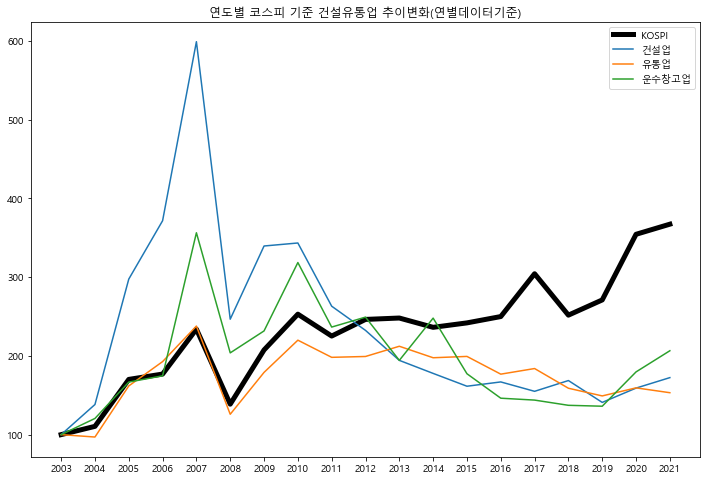

In [18]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")

ax.plot(xtick_label_position,df_sector_year_건설업_index,label = "건설업")
ax.plot(xtick_label_position,df_sector_year_유통업_index,label = "유통업")
ax.plot(xtick_label_position,df_sector_year_운수창고업_index,label = "운수창고업")

plt.legend()
plt.title("연도별 코스피 기준 건설유통업 추이변화(연별데이터기준)")
plt.show()

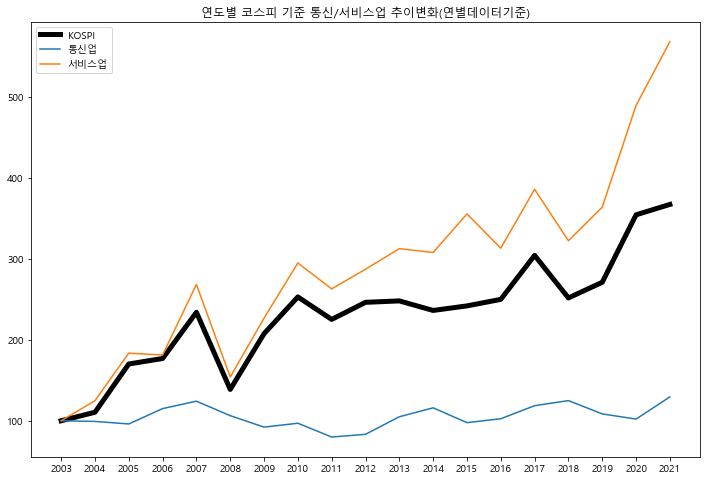

In [19]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_통신업_index,label = "통신업")
ax.plot(xtick_label_position,df_sector_year_서비스업_index,label = "서비스업")

plt.legend()
plt.title("연도별 코스피 기준 통신/서비스업 추이변화(연별데이터기준)")
plt.show()

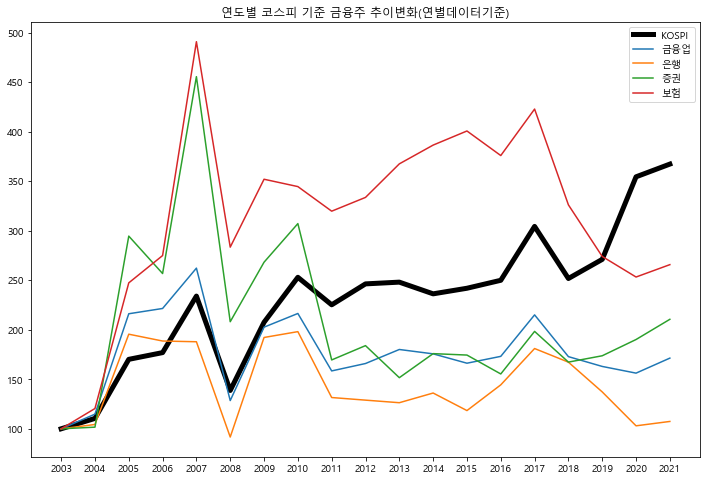

In [20]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_금융업_index,label = "금융업")
ax.plot(xtick_label_position,df_sector_year_은행_index,label = "은행")
ax.plot(xtick_label_position,df_sector_year_증권_index,label = "증권")
ax.plot(xtick_label_position,df_sector_year_보험_index,label = "보험")


plt.legend()
plt.title("연도별 코스피 기준 금융주 추이변화(연별데이터기준)")
plt.show()

# 월별 코스피 기준 섹터별 추이변화

In [21]:
len(df_sector_month['date'].dt.year.unique())

20

In [22]:
df_sector_month_코스피_index = (df_sector_month_코스피['Close'] / df_sector_month_코스피['Close'].iloc[0]) * 100
df_sector_month_음식료품_index = (df_sector_month_음식료품['Close'] / df_sector_month_음식료품['Close'].iloc[0]) * 100
df_sector_month_섬유의복_index = (df_sector_month_섬유의복['Close'] / df_sector_month_섬유의복['Close'].iloc[0]) * 100
df_sector_month_종이목재_index = (df_sector_month_종이목재['Close'] / df_sector_month_종이목재['Close'].iloc[0]) * 100
df_sector_month_화학_index = (df_sector_month_화학['Close'] / df_sector_month_화학['Close'].iloc[0]) * 100
df_sector_month_의약품_index = (df_sector_month_의약품['Close'] / df_sector_month_의약품['Close'].iloc[0]) * 100
df_sector_month_비금속광물_index = (df_sector_month_비금속광물['Close'] / df_sector_month_비금속광물['Close'].iloc[0]) * 100
df_sector_month_철강금속_index = (df_sector_month_철강금속['Close'] / df_sector_month_철강금속['Close'].iloc[0]) * 100
df_sector_month_기계_index = (df_sector_month_기계['Close'] / df_sector_month_기계['Close'].iloc[0]) * 100
df_sector_month_전기전자_index = (df_sector_month_전기전자['Close'] / df_sector_month_전기전자['Close'].iloc[0]) * 100
df_sector_month_의료정밀_index = (df_sector_month_의료정밀['Close'] / df_sector_month_의료정밀['Close'].iloc[0]) * 100
df_sector_month_운수장비_index = (df_sector_month_운수장비['Close'] / df_sector_month_운수장비['Close'].iloc[0]) * 100
df_sector_month_유통업_index = (df_sector_month_유통업['Close'] / df_sector_month_유통업['Close'].iloc[0]) * 100
df_sector_month_전기가스업_index = (df_sector_month_전기가스업['Close'] / df_sector_month_전기가스업['Close'].iloc[0]) * 100
df_sector_month_건설업_index = (df_sector_month_건설업['Close'] / df_sector_month_건설업['Close'].iloc[0]) * 100
df_sector_month_운수창고업_index = (df_sector_month_운수창고업['Close'] / df_sector_month_운수창고업['Close'].iloc[0]) * 100
df_sector_month_통신업_index = (df_sector_month_통신업['Close'] / df_sector_month_통신업['Close'].iloc[0]) * 100
df_sector_month_금융업_index = (df_sector_month_금융업['Close'] / df_sector_month_금융업['Close'].iloc[0]) * 100
df_sector_month_은행_index = (df_sector_month_은행['Close'] / df_sector_month_은행['Close'].iloc[0]) * 100
df_sector_month_증권_index = (df_sector_month_증권['Close'] / df_sector_month_증권['Close'].iloc[0]) * 100
df_sector_month_보험_index = (df_sector_month_보험['Close'] / df_sector_month_보험['Close'].iloc[0]) * 100
df_sector_month_서비스업_index = (df_sector_month_서비스업['Close'] / df_sector_month_서비스업['Close'].iloc[0]) * 100
df_sector_month_제조업_index = (df_sector_month_제조업['Close'] / df_sector_month_제조업['Close'].iloc[0]) * 100

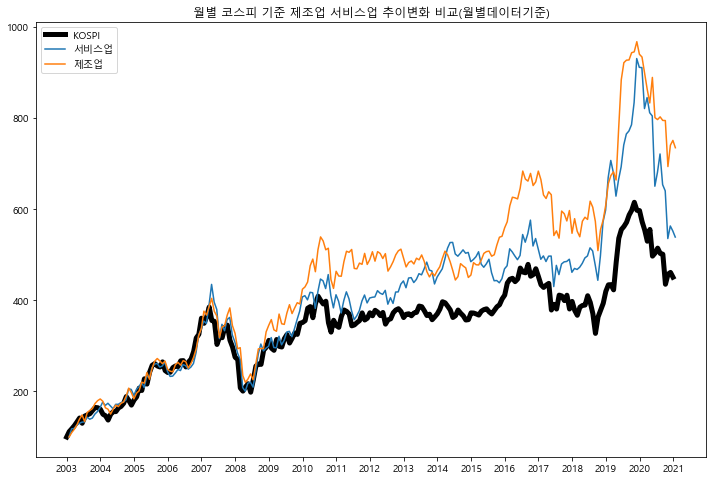

In [23]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)

ax.plot(df_sector_month_코스피_index, linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_서비스업_index,label = "서비스업")
ax.plot(df_sector_month_제조업_index,label = "제조업")

plt.legend()
plt.title("월별 코스피 기준 제조업 서비스업 추이변화 비교(월별데이터기준)")
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())

plt.show()

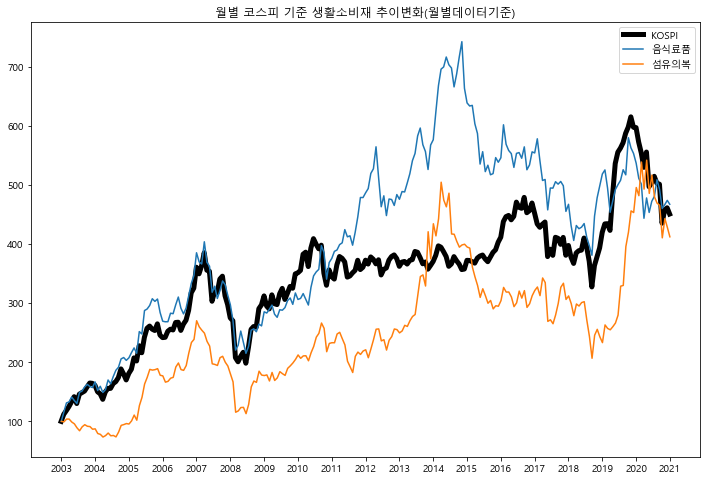

In [24]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_음식료품_index,label = "음식료품")
ax.plot(df_sector_month_섬유의복_index,label = "섬유의복")

plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.legend()
plt.title("월별 코스피 기준 생활소비재 추이변화(월별데이터기준)")
plt.show()

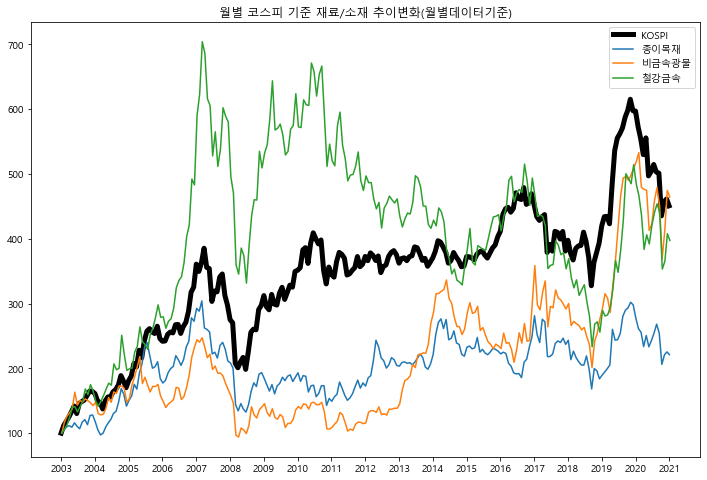

In [25]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_종이목재_index,label = "종이목재")
ax.plot(df_sector_month_비금속광물_index,label = "비금속광물")
ax.plot(df_sector_month_철강금속_index,label = "철강금속")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 재료/소재 추이변화(월별데이터기준)")
plt.show()

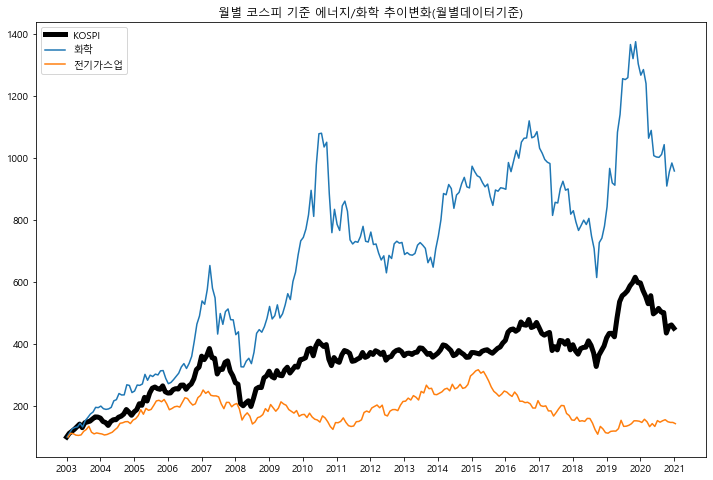

In [26]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_화학_index,label = "화학")
ax.plot(df_sector_month_전기가스업_index,label = "전기가스업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 에너지/화학 추이변화(월별데이터기준)")
plt.show()

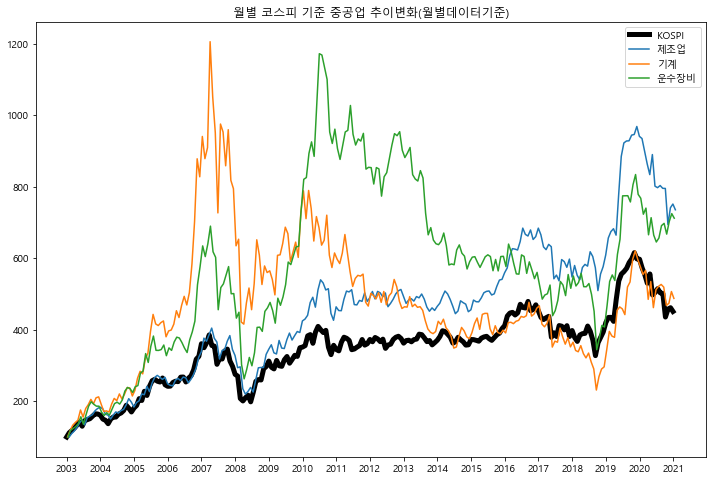

In [27]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_제조업_index,label = "제조업")
ax.plot(df_sector_month_기계_index,label = "기계")
ax.plot(df_sector_month_운수장비_index,label = "운수장비")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 중공업 추이변화(월별데이터기준)")
plt.show()

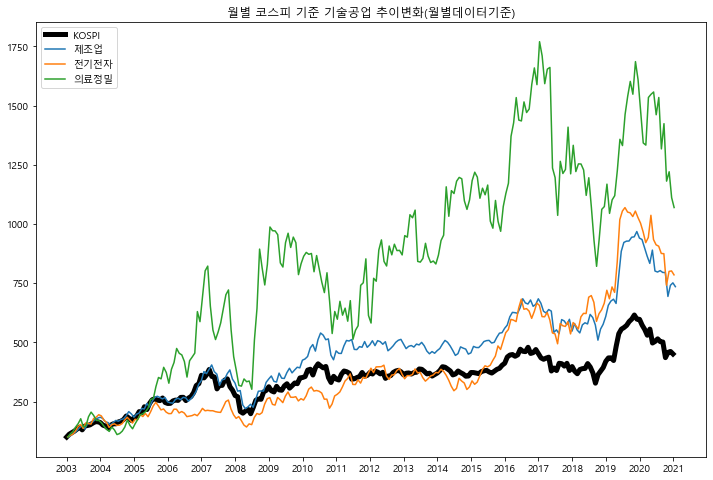

In [28]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_제조업_index,label = "제조업")
ax.plot(df_sector_month_전기전자_index,label = "전기전자")
ax.plot(df_sector_month_의료정밀_index,label = "의료정밀")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 기술공업 추이변화(월별데이터기준)")
plt.show()

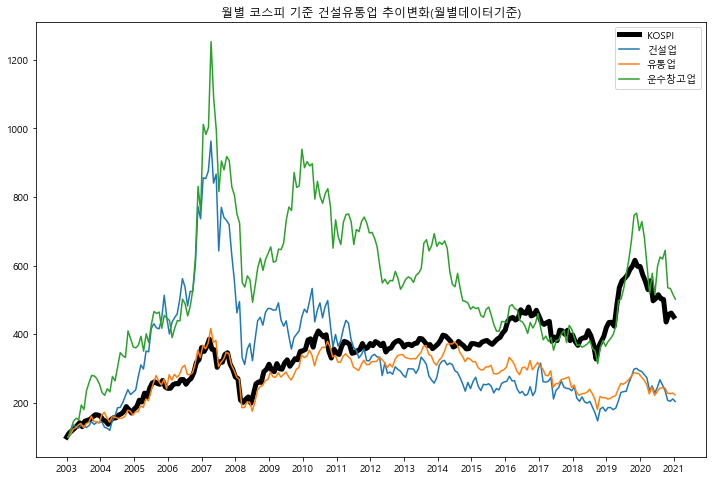

In [29]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")

ax.plot(df_sector_month_건설업_index,label = "건설업")
ax.plot(df_sector_month_유통업_index,label = "유통업")
ax.plot(df_sector_month_운수창고업_index,label = "운수창고업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 건설유통업 추이변화(월별데이터기준)")
plt.show()

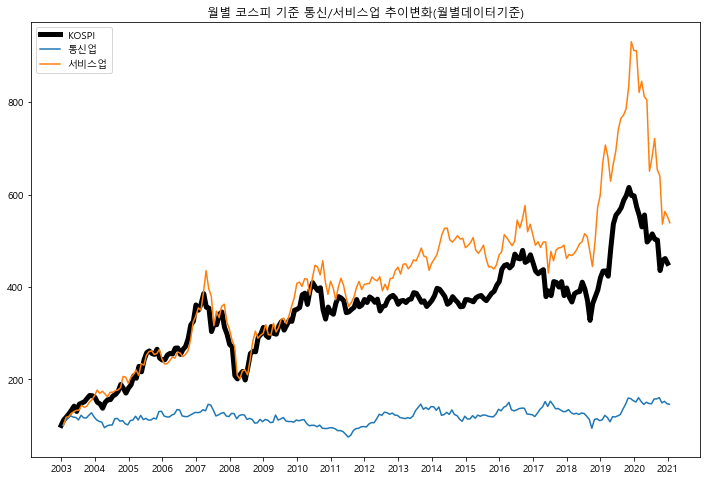

In [30]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_통신업_index,label = "통신업")
ax.plot(df_sector_month_서비스업_index,label = "서비스업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 통신/서비스업 추이변화(월별데이터기준)")
plt.show()

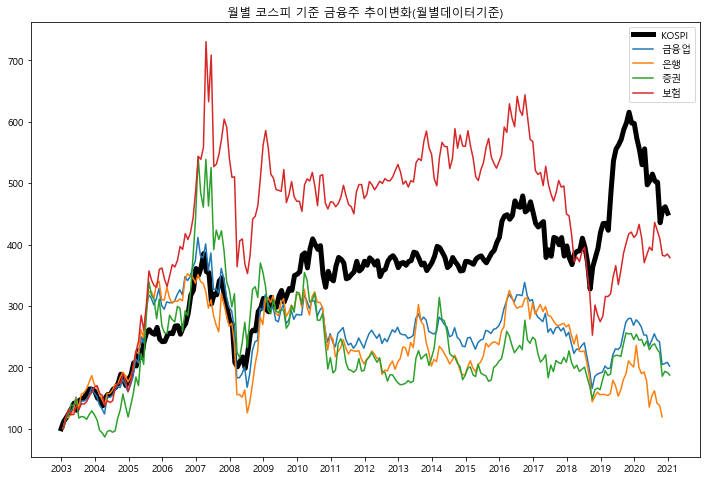

In [31]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_금융업_index,label = "금융업")
ax.plot(df_sector_month_은행_index,label = "은행")
ax.plot(df_sector_month_증권_index,label = "증권")
ax.plot(df_sector_month_보험_index,label = "보험")


plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 금융주 추이변화(월별데이터기준)")
plt.show()